In [11]:
from coglib import coglib
import pandas as pd
#import sys
import matplotlib.pyplot as plt

True


<function matplotlib.pyplot.show(close=None, block=None)>

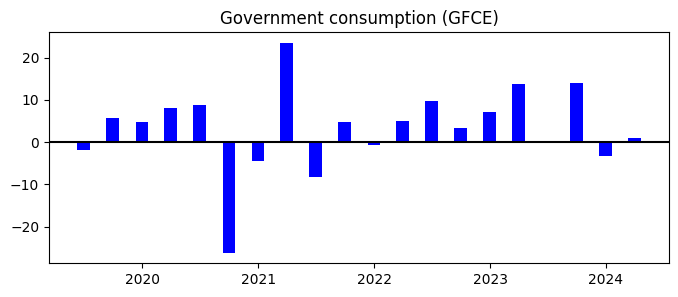

In [12]:
# Initialize API and login
api = coglib.DataFeedAdaptor()
login = api.login("Bhanu.API", "Reset@123")
print(login.status)

# Read CSV data
csvpath = 'National Income DET codes.csv'
csvdata = pd.read_csv(csvpath)
indicator = list(csvdata['id_event'])
symbol = list(csvdata['Symbols'])
name = list(csvdata['name'])
period = list(csvdata['period'])
datatype = list(csvdata['datatype'])
real = zip(indicator, name, datatype, period, symbol)

# Dictionary to store DataFrames
dataframes = {}

# Loop through zipped data
for entry in real:
    indicator, name, datatype, period, symbol = entry
    if login.status:
        #print(indicator)
        # Fetch data from the API
        dt = api.get_econ_timeseries(str(indicator), False)
        data = dt.response[0]
        #print(data)
        # Create DataFrame and store in dictionary
        globals()[symbol] = pd.DataFrame(data.series)

RealGFCEQ =RealGFCEQ[['date','yoy']] 
RealGFCEQ['date'] = pd.to_datetime(RealPFCEQ.date)

RealGFCEQ = RealGFCEQ.set_index('date')

# Ensure 'value' is numeric
RealGFCEQ['yoy'] = pd.to_numeric(RealGFCEQ['yoy'])

# Filter data for the last 4 years
cutoff_date = pd.to_datetime('2019-06-30')
RealGFCEQ = RealGFCEQ[RealGFCEQ.index >= cutoff_date]
fig = plt.figure(figsize = (8,3))

plt.bar(RealGFCEQ.index,RealGFCEQ['yoy'], color='Blue', width =40)
# Add a line on the x-axis
plt.axhline(0, color='black', linestyle='-')

plt.title('Government consumption (GFCE)')
# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

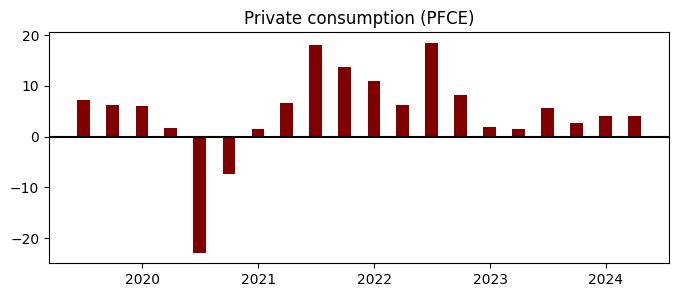

In [13]:
# Loop through zipped data
for entry in real:
    indicator, name, datatype, period, symbol = entry
    if login.status:
        print(indicator)
        # Fetch data from the API
        dt = api.get_econ_timeseries(str(indicator), False)
        data = dt.response[0]
        print(data)
        # Create DataFrame and store in dictionary
        globals()[symbol] = pd.DataFrame(data.series)

RealPFCEQ =RealPFCEQ[['date','yoy']] 
RealPFCEQ['date'] = pd.to_datetime(RealPFCEQ.date)

RealPFCEQ = RealPFCEQ.set_index('date')

# Ensure 'value' is numeric
RealPFCEQ['yoy'] = pd.to_numeric(RealPFCEQ['yoy'])

# Filter data for the last 4 years
cutoff_date = pd.to_datetime('2019-06-30')
RealPFCEQ = RealPFCEQ[RealPFCEQ.index >= cutoff_date]
fig = plt.figure(figsize = (8,3))

plt.bar(RealPFCEQ.index,RealPFCEQ['yoy'], color='maroon', width =40)
# Add a line on the x-axis
plt.axhline(0, color='black', linestyle='-')

plt.title('Private consumption (PFCE)')
# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

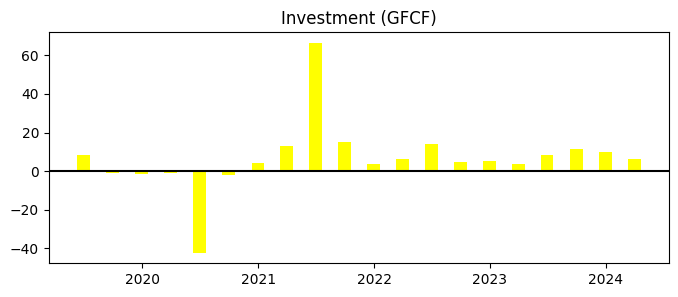

In [14]:
# Loop through zipped data
for entry in real:
    indicator, name, datatype, period, symbol = entry
    if login.status:
        #print(indicator)
        # Fetch data from the API
        dt = api.get_econ_timeseries(str(indicator), False)
        data = dt.response[0]
        #print(data)
        # Create DataFrame and store in dictionary
        globals()[symbol] = pd.DataFrame(data.series)

RealGFCFQ =RealGFCFQ[['date','yoy']] 
RealGFCFQ['date'] = pd.to_datetime(RealGFCFQ.date)

RealGFCFQ = RealGFCFQ.set_index('date')

# Ensure 'value' is numeric
RealGFCFQ['yoy'] = pd.to_numeric(RealGFCFQ['yoy'])

# Filter data for the last 4 years
cutoff_date = pd.to_datetime('2019-06-30')
RealGFCFQ = RealGFCFQ[RealGFCFQ.index >= cutoff_date]
fig = plt.figure(figsize = (8,3))

plt.bar(RealGFCFQ.index,RealGFCFQ['yoy'], color='Yellow', width =40)
# Add a line on the x-axis
plt.axhline(0, color='black', linestyle='-')

plt.title('Investment (GFCF)')
# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=0)
plt.show

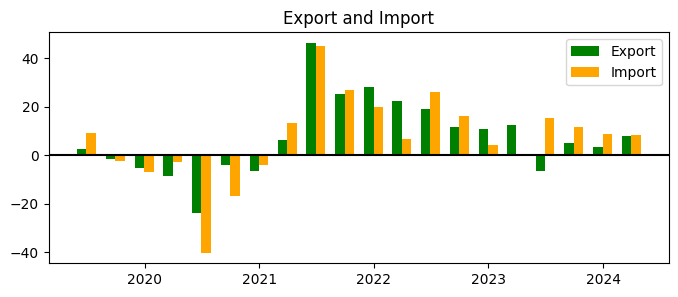

In [15]:
# Read CSV data
csvpath = 'National Income DET codes.csv'
csvdata = pd.read_csv(csvpath)
indicator = list(csvdata['id_event'])
symbol = list(csvdata['Symbols'])
name = list(csvdata['name'])
period = list(csvdata['period'])
datatype = list(csvdata['datatype'])
real = zip(indicator, name, datatype, period, symbol)

# List of desired indicators
desired_indicators = ["RealEXQ", "RealIMQ"]

# Dictionary to store DataFrames
dataframes = {}

# Loop through zipped data
for entry in real:
    indicator, name, datatype, period, symbol = entry
    if symbol in desired_indicators and login.status:
        #print(indicator)
        # Fetch data from the API
        dt = api.get_econ_timeseries(str(indicator), False)
        data = dt.response[0]
        #print(data)
        # Create DataFrame and store in dictionary
        df = pd.DataFrame(data.series)
        df['date'] = pd.to_datetime(df['date'])
        df = df.set_index('date')
        df['yoy'] = pd.to_numeric(df['yoy'])
        
        # Filter data for the last 4 years
        cutoff_date = pd.to_datetime('2019-06-30')
        df = df[df.index >= cutoff_date]
        
        # Store the processed DataFrame in the dictionary
        dataframes[symbol] = df

# Plotting
fig, ax = plt.subplots(figsize=(8, 3))

# Set bar width
bar_width = 30

# Plot the bars for RealEXQ and RealIMQ on the same plot with adjusted x positions
ax.bar(dataframes['RealEXQ'].index - pd.Timedelta(days=bar_width / 2), dataframes['RealEXQ']['yoy'], color='green', width=bar_width, label='Export')
ax.bar(dataframes['RealIMQ'].index + pd.Timedelta(days=bar_width / 2), dataframes['RealIMQ']['yoy'], color='orange', width=bar_width, label='Import')

# Add a line on the x-axis
ax.axhline(0, color='black', linestyle='-')

# Add labels and title


ax.set_title('')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=0)

# Add legend
plt.title('Export and Import')
# Add legend
plt.legend()
plt.show()
